# <center><strong><font color='grey'>Predicting Success of Zomato Restaurants and Sentiment Analysis </font></strong></center>

<img src='Zomato Image.jpg' >

------

# <strong><font color='brown'>Index</font></strong> 

<!-- Let's cover some useful methods and functions built in to pandas. This is actually just a small sampling of the functions and methods available in Pandas, but they are some of the most commonly used.
The [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) is a great resource to continue exploring more methods and functions (we will introduce more further along in the course).
Here is a list of functions and methods we'll cover here (click on one to jump to that section in this notebook.):
 -->
* [Problem Statement](#problem_statement)
* [Libraries](#libraries)
* [Dataset](#data)
* [Data Exploration](#expo)
* [Exploratory Data Analysis](#eda)
* [Data Visualization](#dv)
* [Geospatial Analysis](#geo)
* [Data Preprocessing](#pre)
* [Feature Extraction](#feature)
* [Train | Test | Split ](#tts)
* [Standardization](#std)
* [Applying Machine Learning Algorithms](#ml)
* [Accuracy Check in Different Algorithms](#algo)
* [Sentiment Analysis using NLP](#nlp)
* [WordCloud](#wordcloud)
* [Lemmatization](#lemi)
* [TF-IDF (Term Frequency–Inverse Document Frequency)](#tf)
* [Naive Bayes classification](#nb)
* [Conclusion](#con)




<a id='problem_statement'></a>
## Problem Statement

* The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, cuisine types etc.


* Whenever we visit a new place, we want to go to the best restaurant or the cheapest restaurant, but a decent one. Or we can first look at the ratings or the reviews if we want to try food in some new restaurants. Zomato is one such app that provides users with ratings and reviews of restaurants across India. Ratings or reviews are considered to be one of the most significant/decisive variables that decide how good a restaurant is. We will therefore use the real time data set here in our project that has different factors/features that a user can look into about a restaurant. We restrict our data only to Bangalore City.


* Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food.If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian.


* These kind of analysis can be done using the data, by studying the factors such as
<ol>
<li>Location of the restaurant</li>
<li>Approx Price of food</li>
<li>Theme based restaurant or not</li>
<li>Which locality of that city serves that cuisines with maximum number of restaurants</li>
<li>The needs of people who are striving to get the best cuisine of the neighborhood</li>
<li>Is a particular neighborhood famous for its own kind of food.</li>

</ol>



This dataset is taken from [kaggle.com](https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants) and includes all information 
of restaurants in Bangalore city (51717 rows annd 17 columns) 

## <center>Data Description</center>

<table>
    <tr>
        <td><b>Columns</b></td>
        <td><b>Description</b></td>
    </tr>
    <tr>
        <td>url</td>
        <td>contains the url of the restaurant on the Zomato website<td>
    </tr>
    <tr>
        <td>address</td>
        <td>contains the address of the restaurant in Bangalore</td>
    </tr>
    <tr>
        <td>region</td>
        <td>Region of employment (unordered)</td>
    </tr>
    <tr>
        <td>name</td>
        <td>contains the name of the restaurant</td>
    </tr>
    <tr>
        <td>online_order</td>
        <td>whether online ordering is available in the restaurant or not</td>
    </tr>
    <tr>
        <td>book_table</td>
        <td>Channel of recruitment for employee</td>
    </tr>
    <tr>
        <td>votes</td>
        <td>contains total number of upvotes for the restaurant</td>
    </tr>
    <tr>
        <td>phone</td>
        <td> contains the phone number of the restaurant</td>
    </tr>
    <tr>
        <td>location</td>
        <td>contains the neighborhood in which the restaurant is located</td>
    </tr>
    <tr>
        <td>rest_type</td>
        <td>restaurant type</td>
    </tr>
    <tr>
        <td>dish_liked</td>
        <td>dishes people liked in the restaurant</td>
    </tr>
    <tr>
        <td>cuisines</td>
        <td>food styles, separated by comma</td>
    </tr>
    <tr>
        <td>approx_cost(for two people))</td>
        <td>contains the approximate cost of meal for two people</td>
    </tr>
    <tr>
        <td>reviews_list</td>
        <td>list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer</td>
    </tr>
    <tr>
        <td>menu_item</td>
        <td>contains list of menus available in the restaurant</td>
    </tr>
    <tr>
        <td>listed_in(type)</td>
        <td>type of meal</td>
    </tr>
    <tr>
        <td>listed_in(city)</td>
        <td>contains the neighborhood in which the restaurant is located.</td>
    </tr>
   
</table>

<a id='libraries'></a>
## Importing Libraries

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

<a id='data'></a>
## Importing Dataset

In [311]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

<a id='expo'></a>
# Data Exploration

In [313]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [314]:
df.describe(include='all')

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
### Checking For Null Values

In [315]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [316]:
features_with_Null = [feature for feature in df.columns if df[feature].isnull().sum()]

In [317]:
features_with_Null

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

Checking for how many percentage of Null values are present

In [318]:
for feature in features_with_Null:
    print(f'{feature} has {np.round(df[feature].isnull().sum()/len(df)*100,2)} % missing values',)

rate has 15.03 % missing values
phone has 2.34 % missing values
location has 0.04 % missing values
rest_type has 0.44 % missing values
dish_liked has 54.29 % missing values
cuisines has 0.09 % missing values
approx_cost(for two people) has 0.67 % missing values


<a id='eda'></a>
# Exploratory Data Analysis


-----

### Preparing approx_cost(for two people) column

In [319]:
df[df['approx_cost(for two people)'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
1768,https://www.zomato.com/bangalore/innate-jp-nag...,"45, 14th Main, 7th phase, Puttehahalli Palya, ...",Innate,No,No,NaN,0,NaN,JP Nagar,Delivery,NaN,Beverages,NaN,[],[],Delivery,Bannerghatta Road
1795,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,NaN,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Bannerghatta Road
3069,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,-,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi
3774,https://www.zomato.com/bangalore/the-hub-ibis-...,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,No,No,3.9/5,237,NaN,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",[],Buffet,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50940,https://www.zomato.com/bangalore/cinnabon-whit...,"Ground Floor, The Forum Neighborhood Mall, Pre...",Cinnabon,No,No,4.0 /5,80,NaN,Whitefield,Quick Bites,"Rolls, Cinnamon Roll, Cinnamon Bun","Beverages, American, Bakery",NaN,"[('Rated 4.0', ""RATED\n Who else is a Cinnabo...",[],Desserts,Whitefield
51233,https://www.zomato.com/bangalore/mayas-kitchen...,"43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...",Mayas kitchen,No,No,NaN,0,NaN,Whitefield,Casual Dining,NaN,"South Indian, Chinese, Chettinad",NaN,"[('Rated 4.0', ""RATED\n Food was pretty good,...",[],Dine-out,Whitefield
51247,https://www.zomato.com/bangalore/mast-kalandar...,"D64, 33, 1st Floor, Sundari Armadale, Next To ...",Mast Kalandar,No,No,2.6 /5,76,NaN,Whitefield,Casual Dining,"Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...",North Indian,NaN,"[('Rated 1.0', 'RATED\n Terrible food in this...",[],Dine-out,Whitefield
51271,https://www.zomato.com/bangalore/karavalli-foo...,"N254-107, 1st Main Road, Near ITPL Gate 3, KIA...",Karavalli Food Court,No,No,3.2 /5,4,NaN,Whitefield,Casual Dining,NaN,South Indian,NaN,"[('Rated 1.0', 'RATED\n i was a regular custo...",[],Dine-out,Whitefield


In [320]:
df['approx_cost(for two people)'].value_counts()

300      7576
400      6562
500      4980
200      4857
600      3714
         ... 
60          1
5,000       1
3,700       1
469         1
160         1
Name: approx_cost(for two people), Length: 70, dtype: int64

In [321]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

* It have some NAN values so it will be of float data-type,that's why first we have to convert it into string then need have to remove this comma

In [322]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',',''))
df['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: object

In [323]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

`approx_cost(for two people) `has `object` data type so need to convert it into `float`

In [324]:
#  Now converting to float dtype

df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [325]:
df['approx_cost(for two people)'].dtype

dtype('float64')

### Preparing rate column

In [326]:
df['rate'].dtype

dtype('O')

In [327]:
df['rate'].isnull().sum()

7775

In [328]:
df['rate'].value_counts()

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [329]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

This `rate` column is of `object` dtype which should be of `float` dtype, contains  ` '/' ` , `'NEW'` and some `nan` values

So we need to clean this 

In [330]:
df['rate'][0].split('/')[0]

'4.1'

In [331]:
df['rate'] = df['rate'].astype(str).apply(lambda x: x.split('/')[0])
df['rate']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712    3.6 
51713     nan
51714     nan
51715    4.3 
51716    3.4 
Name: rate, Length: 51717, dtype: object

In [332]:
df['rate'].replace('NEW',0,inplace=True)
df['rate'].replace('-',0,inplace=True)

In [333]:
df['rate']=df['rate'].astype(str).astype(float)

In [334]:
df['rate'].dtype

dtype('float64')

In [335]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4,
       2.2, 2.3, 4.8, 4.9, 2.1, 2. , 1.8])

<a id='dv'></a>
# Data Visualization

---

###  No. of restaurants in a particular location

Text(0.5, 1.0, 'NO. of restaurants in a Location')

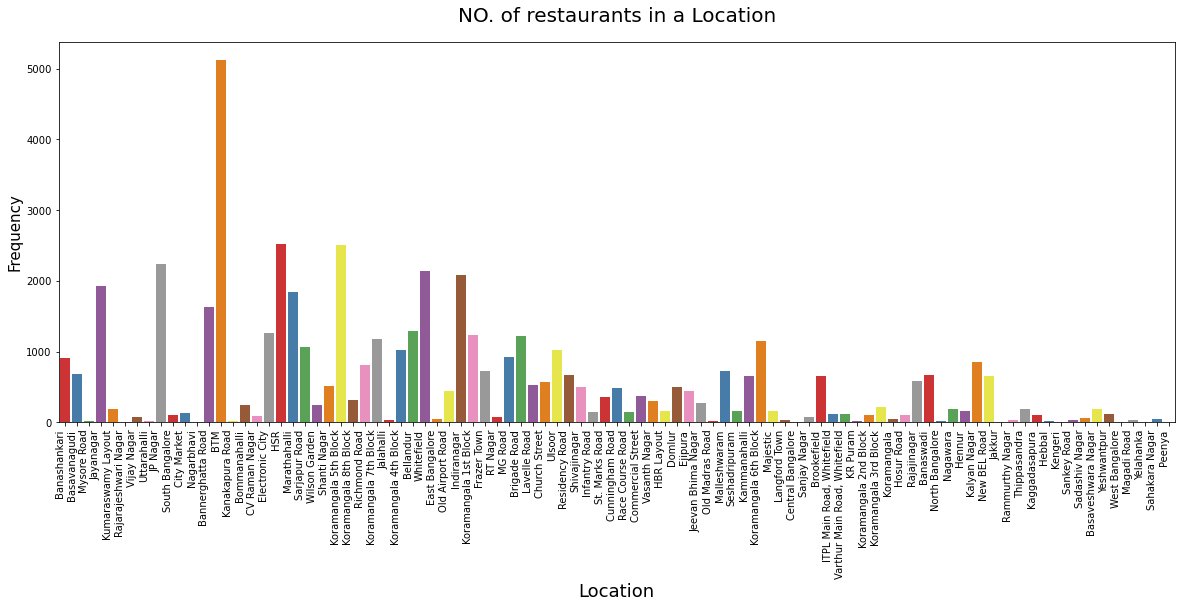

In [336]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

###  Frequency of different types of restaurants

In [337]:
df['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

Text(0.5, 1.0, 'Restaurant types')

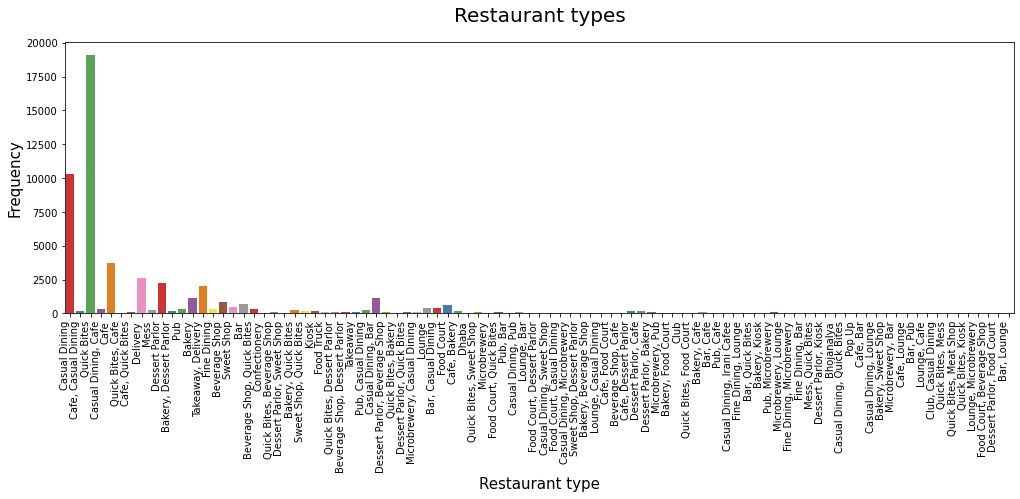

In [338]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=df, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

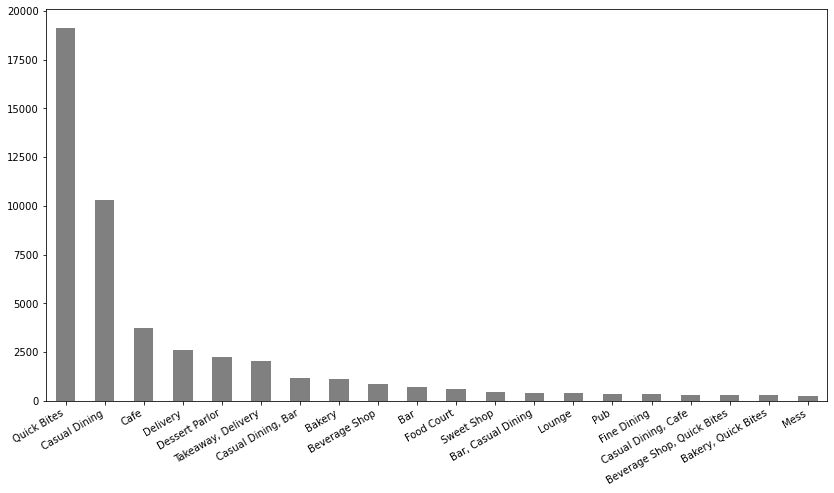

In [339]:
plt.figure(figsize=(14,8))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='grey')
plt.gcf().autofmt_xdate()


### Most famous restaurant chains in Bangalore

In [340]:
df['name'].value_counts()[:20]

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Chef Baker's         62
Pizza Hut            62
Domino's Pizza       60
KFC                  60
Sweet Truth          60
Subway               60
Beijing Bites        60
Smoor                59
McDonald's           59
Chai Point           58
Faasos               57
Name: name, dtype: int64

Text(0.5, 0, 'Number of outlets')

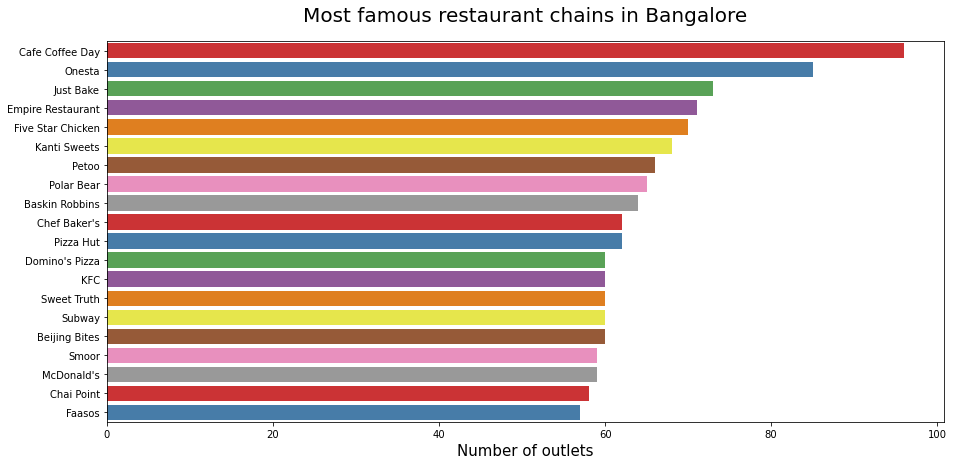

In [341]:
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangalore",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

<!-- . -->

In [342]:
def mark(x):
    if x in ('Quick Bites', 'Casual Dining'):
        return 'Quick Bites + Casual Dining'
    else:
        return 'Other'
    

In [343]:
df['Top_types']=df['rest_type'].apply(mark)
df['Top_types']

0        Quick Bites + Casual Dining
1        Quick Bites + Casual Dining
2                              Other
3        Quick Bites + Casual Dining
4        Quick Bites + Casual Dining
                    ...             
51712                          Other
51713                          Other
51714                          Other
51715                          Other
51716                          Other
Name: Top_types, Length: 51717, dtype: object

In [344]:
# pip install plotly.express

In [345]:
import plotly.express as px
values=df['Top_types'].value_counts()
labels=df['Top_types'].value_counts().index

In [346]:
fig = px.pie(df, values=values, names=labels,title='Pie Chart for Types Of Restaurants')
fig.show()

From PieChart we can see that almost 60 % of restaurants are of Casual Dining & Quick Bites

<!-- . -->

In [347]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Other
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining


In [348]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Top_types                       object
dtype: object

In [349]:
rest=df.groupby('name').agg({'votes': 'sum','url': 'count','approx_cost(for two people)': 'mean','rate': 'mean'}).reset_index()
rest

,name,votes,url,approx_cost(for two people),rate
0,#FeelTheROLL,14,2,200.0,3.400000
1,#L-81 Cafe,432,9,400.0,3.900000
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.700000
4,'Brahmins' Thatte Idli,0,1,100.0,NaN
...,...,...,...,...,...
8787,late100,0,5,200.0,NaN
8788,nu.tree,1443,8,400.0,4.314286
8789,re:cess - Hilton Bangalore Embassy GolfLinks,438,3,1200.0,4.100000
8790,repEAT Hub,0,2,200.0,NaN


In [350]:
rest.columns = ['name', 'total_votes', 'total_unities', 'avg_approx_cost', 'mean_rating']
rest.head()

,name,total_votes,total_unities,avg_approx_cost,mean_rating
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [351]:
rest['votes_per_unity'] = rest['total_votes'] / rest['total_unities']
rest.head()

,name,total_votes,total_unities,avg_approx_cost,mean_rating,votes_per_unity
0,#FeelTheROLL,14,2,200.0,3.4,7.0
1,#L-81 Cafe,432,9,400.0,3.9,48.0
2,#Vibes Restro,0,3,700.0,NaN,0.0
3,#refuel,111,3,400.0,3.7,37.0
4,'Brahmins' Thatte Idli,0,1,100.0,NaN,0.0


In [352]:
popular=rest.sort_values(by='total_unities', ascending=False)
popular

,name,total_votes,total_unities,avg_approx_cost,mean_rating,votes_per_unity
1320,Cafe Coffee Day,3089,96,844.791667,3.147191,32.177083
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
3788,Just Bake,2898,73,400.000000,3.355882,39.698630
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
2577,Five Star Chicken,3134,70,257.857143,3.425000,44.771429
...,...,...,...,...,...,...
1900,Cool Break,11,1,150.000000,3.400000,11.000000
8076,The Shake Factory Originals,8,1,200.000000,3.300000,8.000000
5216,Nethravathi Military Hotel,0,1,200.000000,NaN,0.000000
7426,Swadisht North Indian Restaurant,23,1,200.000000,3.200000,23.000000


In [353]:
popular['name'].nunique()

8792

In [354]:
popular.shape

(8792, 6)

Text(0.5, 1.0, 'Top 5 Less Voted Restaurants\n(with at least 1 vote)')

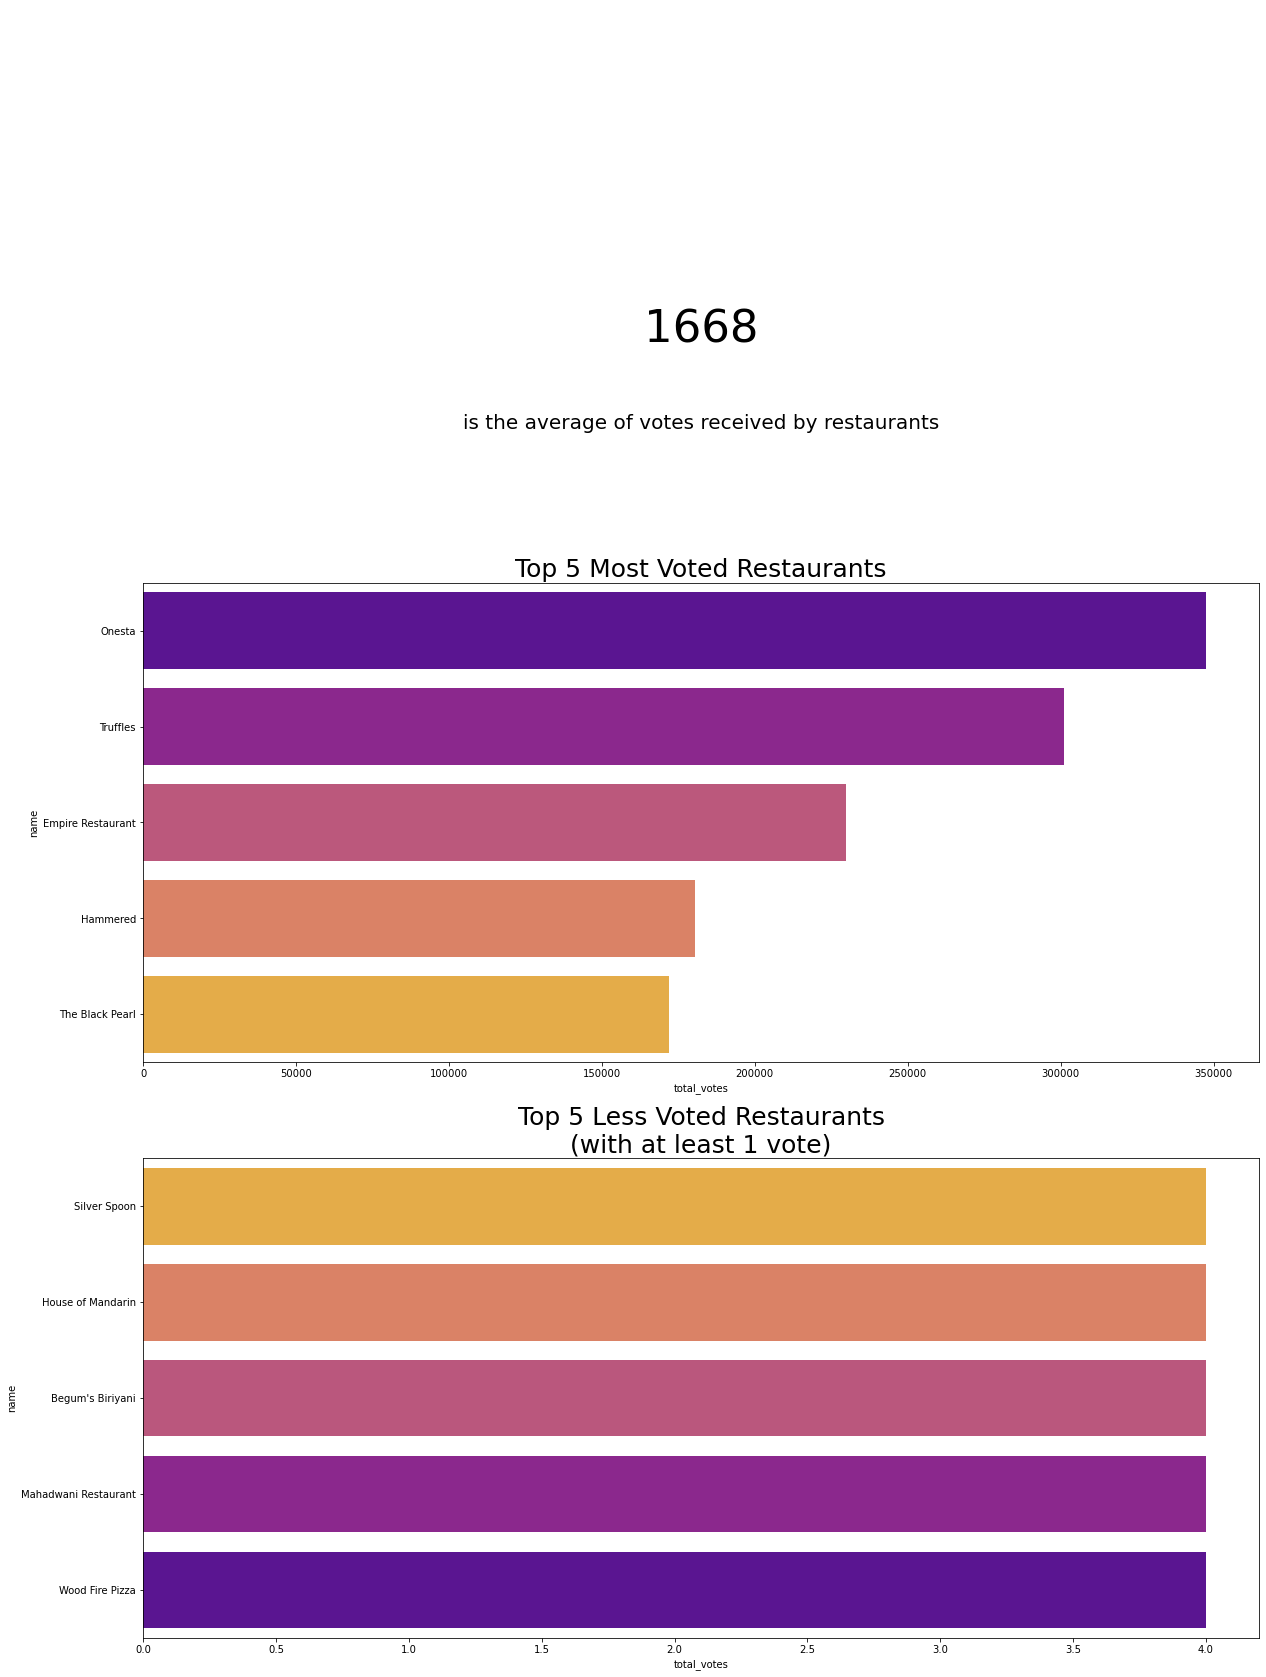

In [355]:
# Creating a figure for restaurants overview analysis
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,30))

# Plot Pack 01 - Most popular restaurants (votes)

# Annotations
ax1.text(0.50, 0.30, int(popular['total_votes'].mean()), fontsize=45, ha='center')
ax1.text(0.50, 0.12, 'is the average of votes received by restaurants', fontsize=20, ha='center')
ax1.axis('off')

sns.barplot(x='total_votes', y='name', data=popular.sort_values(by='total_votes', ascending=False)[0:5],ax=ax2, palette='plasma')
ax2.set_title('Top 5 Most Voted Restaurants', size=25)


sns.barplot(x='total_votes', y='name', data=popular.sort_values(by='total_votes', ascending=False).query('total_votes > 0').tail(),ax=ax3, palette='plasma_r')
ax3.set_title('Top 5 Less Voted Restaurants\n(with at least 1 vote)', size=25)


Text(0.5, 1.0, 'Top 5 Less Expensive Restaurants')

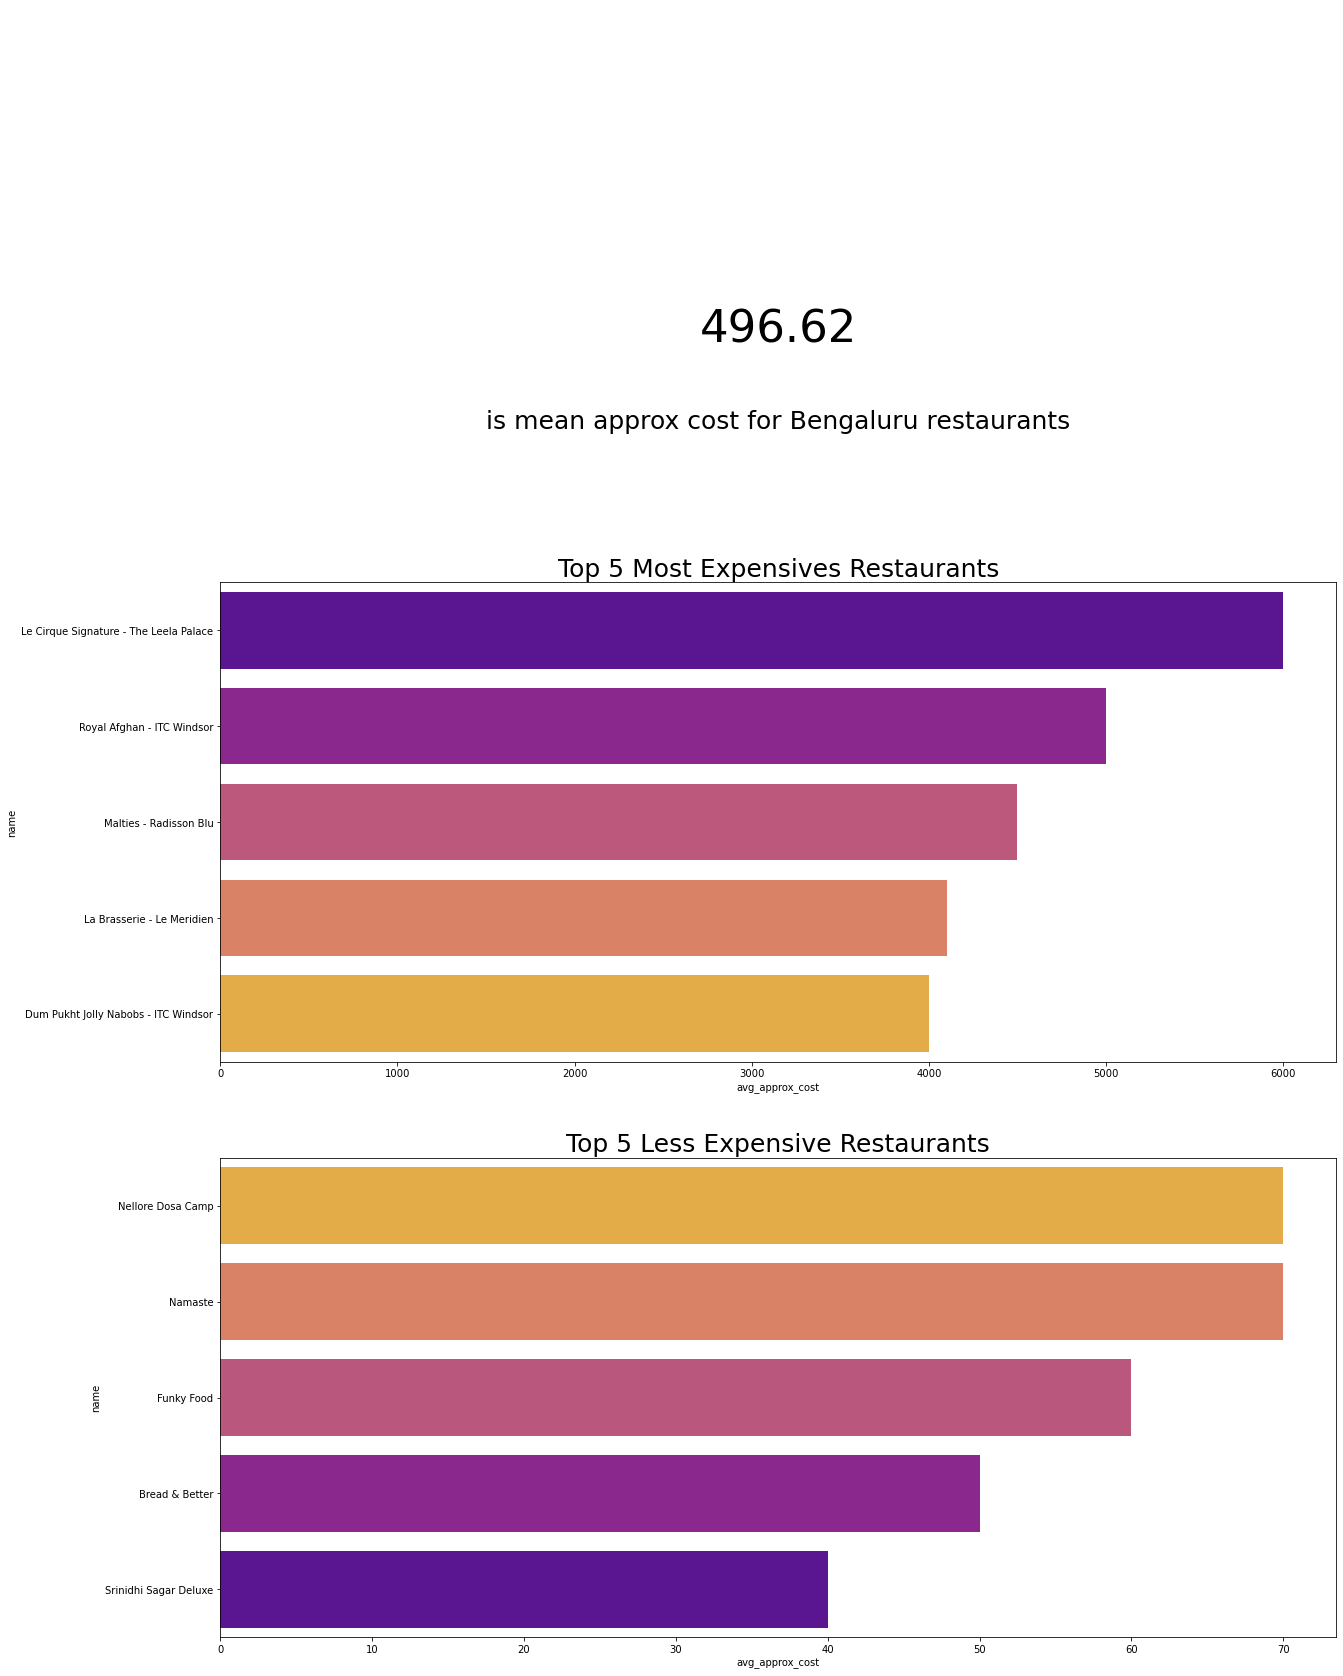

In [356]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,30))
# Annotations
import numpy as np
ax1.text(0.50, 0.30, np.round(popular['avg_approx_cost'].mean(), 2), fontsize=45, ha='center')
ax1.text(0.50, 0.12, 'is mean approx cost for Bengaluru restaurants', fontsize=25, ha='center')
ax1.text(0.50, 0.00, '', fontsize=12, ha='center')
ax1.axis('off')

sns.barplot(x='avg_approx_cost', y='name', data=popular.sort_values(by='avg_approx_cost', ascending=False)[0:5],ax=ax2, palette='plasma')
ax2.set_title('Top 5 Most Expensives Restaurants', size=25)

sns.barplot(x='avg_approx_cost', y='name', data=popular.sort_values(by='avg_approx_cost', ascending=False).query('avg_approx_cost > 0').tail(),ax=ax3, palette='plasma_r')
ax3.set_title('Top 5 Less Expensive Restaurants', size=25)


From above Data Visualization we can conclude that 496₹ is the average approx cost for Bengaluru restaurants.

###  Checking for How many restaurants offer Book Table service? And what about Online Order service?

In [357]:
df['book_table'].value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [358]:
import plotly.graph_objs as go
from plotly.offline import iplot
x=df['book_table'].value_counts()
labels=['Not Available Table Book service','Available Table Book service']


In [359]:
trace=go.Pie(labels=labels, values=x,
               hoverinfo='label+percent', textinfo='percent', 
               textfont=dict(size=20),
              pull=[0, 0, 0,0.2, 0]
               )
iplot([trace])

In [360]:
df['online_order'].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

In [361]:
import plotly.express as px
x=df['online_order'].value_counts()
labels=['Accept','Not Accept']

In [362]:
fig = px.pie(df, values=x, names=labels,title='Pie chart')
fig.show()

<!-- . -->

### Percentage of restaurants according to their types

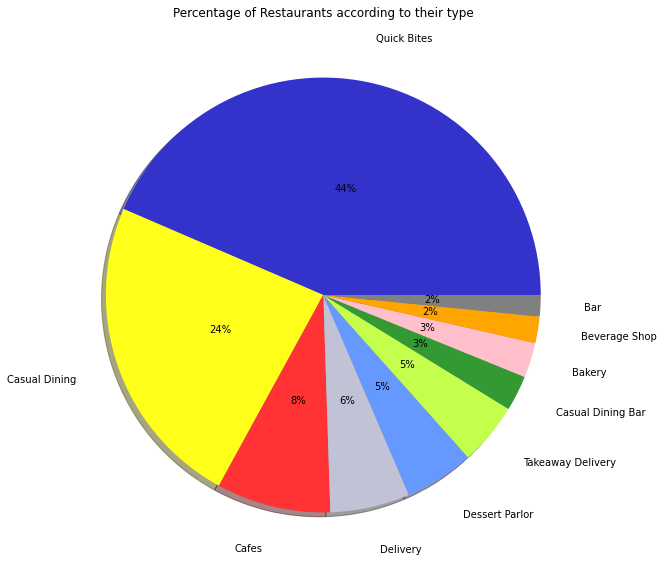

In [363]:
plt.figure(figsize=(10,10))
restaurantTypeCount=df['rest_type'].value_counts().sort_values(ascending=False)
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6],
        restaurantTypeCount[7],
        restaurantTypeCount[8],
        restaurantTypeCount[9]]
labels=['Quick Bites','Casual Dining','Cafes','Delivery','Dessert Parlor ','Takeaway Delivery','Casual Dining Bar ','Bakery','Beverage Shop','Bar']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933','pink','orange','grey']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their type")
plt.show()

### Restaurant rating distribution

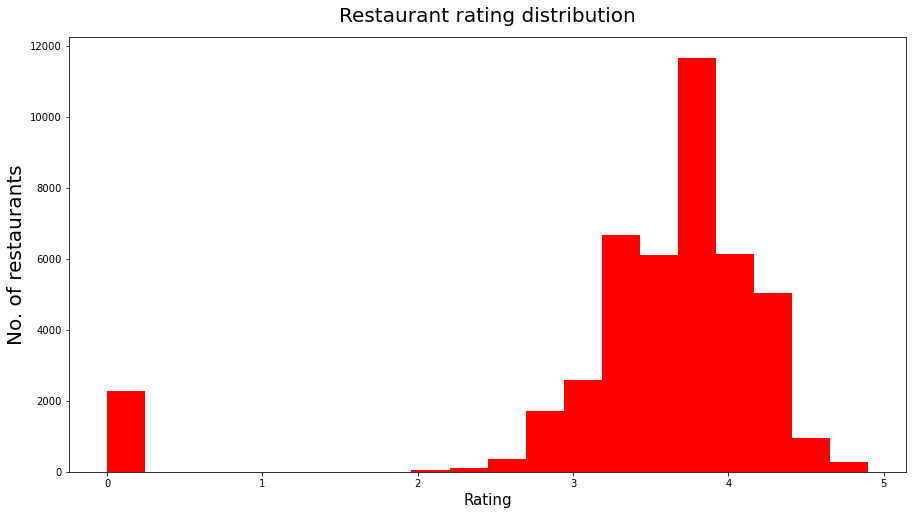

In [364]:
plt.figure(figsize=(15,8))
rating = df['rate']
plt.hist(rating,bins=20,color="red")
plt.title('Restaurant rating distribution', size = 20, pad = 15)
plt.xlabel('Rating',size = 15)
plt.ylabel('No. of restaurants',size = 20)
plt.show()

### Most popular cuisines of Bangalore

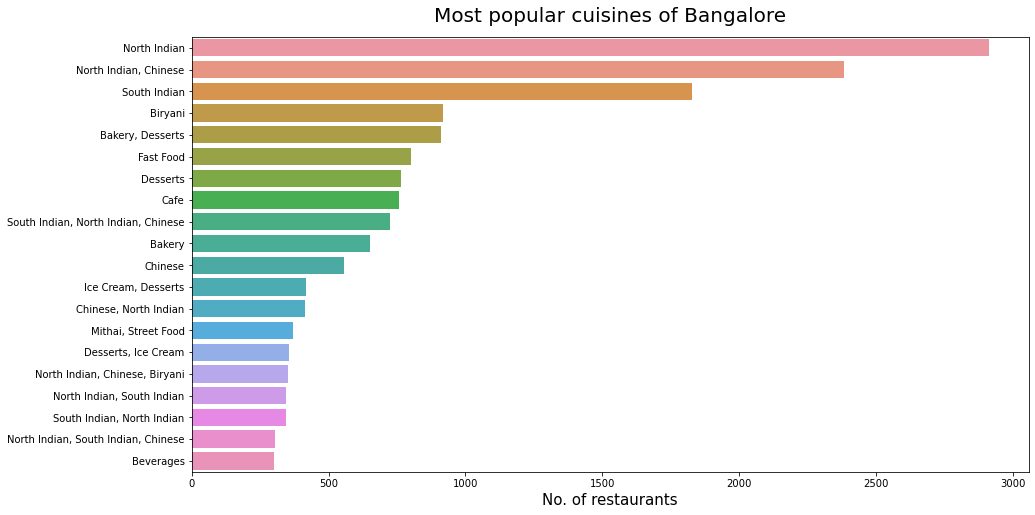

In [365]:
plt.figure(figsize=(15,8))
cuisines=df['cuisines'].value_counts()[:20]
sns.barplot(cuisines,cuisines.index)
plt.title('Most popular cuisines of Bangalore', size = 20, pad = 15)
plt.xlabel('No. of restaurants',size = 15)
plt.show()

### Finding Best Budget Restaurants in any location

Creating a function that will return names of restaurants

In [366]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) &
              (df['location']==location) & (df['rate']>4) &
              (df['rest_type']==restaurant)]
    return(budget['name'].unique())

return_budget('BTM',"Quick Bites")

BTM is the location.

Quick Bites is the type of restaurant.

In [367]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

In [368]:
return_budget('Banashankari',"Quick Bites")

array(['The Biryani Cafe', 'Bengaluru Coffee House', 'Mini Punjabi Dhaba',
       'Udupi Ruchi Grand', 'Ayodhya Upachar', 'Taaza Thindi',
       'Sri Laxmi Venkateshwara Coffee Bar', 'SLV Refreshment'],
      dtype=object)

-----
<!-- // -->

<a id='geo'></a>

# Geospatial Analysis

##### We need Latitudes & longitudes of each place to do Geospatial Data Analysis,by using Geopy we will get  Latitudes & longitudes.


* geopy is a Python client for several popular geocoding web services. geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.

* nominatim --> it is the open search street map of data

In [369]:
# !pip install geopy

In [370]:
from geopy.geocoders import Nominatim

In [371]:
locations = pd.DataFrame({'Name':df['location'].unique()})
locations

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout
...,...
89,West Bangalore
90,Magadi Road
91,Yelahanka
92,Sahakara Nagar


In [372]:
lat=[]
lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:    
        lat.append(location.latitude)
        lon.append(location.longitude)

In [373]:
locations['latitude']=lat
locations['longitude']=lon

In [374]:
locations.head()

,Name,latitude,longitude
0,Banashankari,15.887678,75.704678
1,Basavanagudi,12.941726,77.575502
2,Mysore Road,12.387214,76.666963
3,Jayanagar,27.643927,83.052805
4,Kumaraswamy Layout,12.908149,77.555318


In [375]:
# locations.to_csv('zomato_locations.csv',index=False)

#### We got latitude and longitude of each location listed in the dataset using geopy.
#### This is used to plot maps.¶

In [376]:
df['location'].nunique()

93

In [377]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [378]:
df['location'].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [379]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())


In [380]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

,Name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144


Now we need combine both the dataframes.
* On the basis of Name


In [381]:
Restaurant_locations=Rest_locations.merge(locations,on='Name').dropna()
Restaurant_locations.head()

,Name,count,latitude,longitude
0,BTM,5124,45.954851,-112.496595
1,HSR,2523,18.147500,41.538889
2,Koramangala 5th Block,2504,12.934377,77.628415
3,JP Nagar,2235,12.265594,76.646540
4,Whitefield,2144,44.373058,-71.611858


In [382]:
# pip install folium

In [383]:
import folium
from folium.plugins import HeatMap


In [384]:
# BAse Map
folium.Map()

In [385]:
basemap = folium.Map(location=[12.97,77.59])
basemap

In [386]:
HeatMap(data=Restaurant_locations[['latitude','longitude','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [387]:
basemap

#### From Above Map  It is clear that restaurants tend to concentrate in central bangalore area.
    * The clutter of restaurants lowers are we move away from central.
    * So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.
    * note heatmap is good when we have latitude,longitude or imporatnce of that particular place or count of that place

<a id='pre'></a>

# Data Preprocessing

## Preparing Data for modeling purpose

some restaurants have no rating in data so 

We'll create data two different for restaurants

1. new_restaurant -- rating = 0
2. train_val -- rating = 1

In [388]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Other
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining


In [389]:
def assign(x):
    if x>0:
        return 1
    else:
        return 0

In [390]:
df['rated'] = df['rate'].apply(assign)
df['rated']

0        1
1        1
2        1
3        1
4        1
        ..
51712    1
51713    0
51714    0
51715    1
51716    1
Name: rated, Length: 51717, dtype: int64

In [391]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated'],
      dtype='object')

In [392]:
df['rated'].unique()

array([1, 0], dtype=int64)

In [393]:
new_restaurants = df[df['rated'] == 0]
train_val_restaurants = df.query('rated == 1')

In [394]:
train_val_restaurants['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [395]:
train_val_restaurants['rate'].value_counts()

3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: rate, dtype: int64

## Creating a Target Variable

* if restaurant rating is less than 3.75 will be considered as bad(0).

* if restaurant rating is greater than 3.75 will be considered as good(1).

In [396]:
# By using lambda function

threshold = 3.75
train_val_restaurants['target'] = train_val_restaurants['rate'].apply(lambda x:1 if x >= threshold else 0)

In [397]:
train_val_restaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Other,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1


In [398]:
x = train_val_restaurants['target'].value_counts()
x

0    21421
1    20244
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

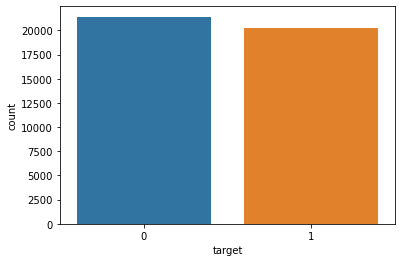

In [399]:
sns.countplot(data=train_val_restaurants,x='target')

In [400]:
labels = x.index

In [401]:
fig2 = px.pie(train_val_restaurants, values=x, names=labels,title='Pie Chart for Restaurants which are Good(1) and Bad(0)')
fig2.show()

<a id='feature'></a>

## Performing Feature Extraction on data

After defining the target and splitting the data into train+val and test sets, let's define the features to be used on training. Here we will take a look at the raw data to select valuable features and apply some steps to create another ones.

The initial set of selected features inclue:

- online_order;
- book_table;
- location;
- rest_type;
- cuisines;
- listed_in(type);
- listed_in(city);
- approx_cost

In [402]:
train_val_restaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Other,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1


* we have different types of cuisines in dataframe so w'll take total count of cuisins counts.
* same for rest_type 

In [403]:
train_val_restaurants['cuisines'][0]

'North Indian, Mughlai, Chinese'

In [404]:
train_val_restaurants['cuisines'][0].split(',')

['North Indian', ' Mughlai', ' Chinese']

In [405]:
len(train_val_restaurants['cuisines'][0].split(','))

3

In [406]:
def count(x):
    return len(x.split(','))

In [407]:
train_val_restaurants['total_cuisines'] = train_val_restaurants['cuisines'].astype(str).apply(count)

In [408]:
train_val_restaurants['multiple_types'] = train_val_restaurants['rest_type'].astype(str).apply(count)

In [409]:
train_val_restaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target,total_cuisines,multiple_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,3,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,...,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,3,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Other,1,1,3,2
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,...,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,0,2,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,2,1


In [410]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target',
       'total_cuisines', 'multiple_types'],
      dtype='object')

In [411]:
# train_val_restaurants.to_csv('zomato_NLP.csv')

In [412]:
imp_features=['online_order','book_table','location','rest_type','multiple_types','total_cuisines',
              'listed_in(type)', 'listed_in(city)','approx_cost(for two people)','target']

In [413]:
data = train_val_restaurants[imp_features]
data.head()

,online_order,book_table,location,rest_type,multiple_types,total_cuisines,listed_in(type),listed_in(city),approx_cost(for two people),target
0,Yes,Yes,Banashankari,Casual Dining,1,3,Buffet,Banashankari,800.0,1
1,Yes,No,Banashankari,Casual Dining,1,3,Buffet,Banashankari,800.0,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",2,3,Buffet,Banashankari,800.0,1
3,No,No,Banashankari,Quick Bites,1,2,Buffet,Banashankari,300.0,0
4,No,No,Basavanagudi,Casual Dining,1,2,Buffet,Banashankari,600.0,1


In [414]:
data.shape

(41665, 10)

### Handling Missing Values in Data.

In [415]:
data.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
multiple_types                   0
total_cuisines                   0
listed_in(type)                  0
listed_in(city)                  0
approx_cost(for two people)    247
target                           0
dtype: int64

In [416]:
data.dropna(how='any',inplace=True)  # remove entier row for null value

### Separating categorical and numerical features

In [417]:
data.dtypes

online_order                    object
book_table                      object
location                        object
rest_type                       object
multiple_types                   int64
total_cuisines                   int64
listed_in(type)                 object
listed_in(city)                 object
approx_cost(for two people)    float64
target                           int64
dtype: object

In [418]:

# cat_col = []
# for col in data.columns:
#     if data[col].dtype =='O':
#         cat_col.append(col)
# cat_col




In [419]:
cat_features= [col for col in data.columns if data[col].dtype == 'O']
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [420]:
num_features= [col for col in data.columns if data[col].dtype != 'O']
num_features

['multiple_types', 'total_cuisines', 'approx_cost(for two people)', 'target']

In [421]:
# Checking for how many features we have in categorical feature

for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


## Performing Feature encoding on data.

In [422]:
data[cat_features].head()

,online_order,book_table,location,rest_type,listed_in(type),listed_in(city)
0,Yes,Yes,Banashankari,Casual Dining,Buffet,Banashankari
1,Yes,No,Banashankari,Casual Dining,Buffet,Banashankari
2,Yes,No,Banashankari,"Cafe, Casual Dining",Buffet,Banashankari
3,No,No,Banashankari,Quick Bites,Buffet,Banashankari
4,No,No,Basavanagudi,Casual Dining,Buffet,Banashankari


In [423]:
data['location'].value_counts()

BTM                      3879
Koramangala 5th Block    2297
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

* online_order has total 2 unique features so we'll use one hot encoding.
* location has total 92 unique features here we cannot use one hot encoding because it will create 92 more columns model will become complex.
* so we'll find the percentage contribution of each location by dividing length of data.


In [424]:
(data['location'].value_counts()/len(data)) * 100

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Nagarbhavi               0.002423
Peenya                   0.002423
Name: location, Length: 92, dtype: float64

In [425]:
values = (data['location'].value_counts()/len(data)) *100
values

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Nagarbhavi               0.002423
Peenya                   0.002423
Name: location, Length: 92, dtype: float64

* we'll set a threshold value of 0.4 if values > threshold then only i will consider it.

In [426]:
threshold2 = 0.4

imp = values[values > threshold2]

In [427]:
imp.nunique()

45

In [428]:
data['location'].nunique()

92

In [429]:
imp.index

Index(['BTM', 'Koramangala 5th Block', 'HSR', 'Indiranagar', 'JP Nagar',
       'Jayanagar', 'Whitefield', 'Marathahalli', 'Bannerghatta Road',
       'Koramangala 7th Block', 'Koramangala 6th Block', 'Brigade Road',
       'Bellandur', 'Sarjapur Road', 'Koramangala 1st Block', 'Ulsoor',
       'Koramangala 4th Block', 'Electronic City', 'MG Road', 'Banashankari',
       'Kalyan Nagar', 'Malleshwaram', 'Residency Road', 'Richmond Road',
       'Basavanagudi', 'Frazer Town', 'Church Street', 'Brookefield',
       'New BEL Road', 'Kammanahalli', 'Lavelle Road', 'Cunningham Road',
       'Banaswadi', 'Rajajinagar', 'Domlur', 'Shanti Nagar',
       'Old Airport Road', 'St. Marks Road', 'Shivajinagar',
       'Commercial Street', 'Ejipura', 'Jeevan Bhima Nagar', 'Vasanth Nagar',
       'Koramangala 8th Block', 'Koramangala 3rd Block', 'Wilson Garden'],
      dtype='object')

In [430]:
# # we can do same on other features like rest_type , listed_in(city)

# cols=['location','rest_type','listed_in(city)']
# for col in cols:
#     print('Total feature in {} are {}'.format(col,data[col].nunique()))
#     print(data[col].value_counts()/(len(data))*100)
#     print('\n')
    

<!-- . -->

In [431]:
data['location']=np.where(data['location'].isin(imp.index),data['location'],'other')

#data['location']=data['location'].apply(lambda x:'other' if x not in imp.index else x)

In [432]:
data['location'].nunique()


47

In [433]:
data['location'].unique()


array(['Banashankari', 'Basavanagudi', 'other', 'Jayanagar', 'JP Nagar',
       'Bannerghatta Road', 'BTM', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'Whitefield', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'St. Marks Road', 'Cunningham Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Kammanahalli', 'Koramangala 6th Block', 'Brookefield',
       'Koramangala 3rd Block', 'Koramangala 4th Block', 'Banaswadi',
       'Kalyan Nagar', 'Malleshwaram', 'Rajajinagar', 'New BEL Road'],
      dtype=object)

In [434]:
data['location'].value_counts()

BTM                      3879
other                    2793
Koramangala 5th Block    2297
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
Jayanagar                1634
Whitefield               1572
Marathahalli             1410
Bannerghatta Road        1226
Koramangala 7th Block    1055
Koramangala 6th Block    1054
Brigade Road             1052
Bellandur                 997
Sarjapur Road             854
Koramangala 1st Block     852
Ulsoor                    849
Koramangala 4th Block     841
Electronic City           834
MG Road                   793
Banashankari              744
Kalyan Nagar              694
Malleshwaram              641
Richmond Road             604
Residency Road            604
Basavanagudi              595
Frazer Town               566
Church Street             546
Brookefield               543
New BEL Road              506
Kammanahalli              493
Lavelle Road              481
Cunningham Road           475
Banaswadi 

#### for rest_type

* rest_type has total 87 unique features so we'll set threshold of 1.5

In [435]:
values2=data['rest_type'].value_counts()/len(data)*100
values2

Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Food Court, Beverage Shop      0.004846
Dessert Parlor, Food Court     0.004846
Dessert Parlor, Kiosk          0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: rest_type, Length: 87, dtype: float64

In [436]:
threshold=1.5
imp2=values2[values2 > 1.5]
imp2

Quick Bites           33.643478
Casual Dining         23.299654
Cafe                   8.163117
Dessert Parlor         4.482566
Delivery               4.048848
Takeaway, Delivery     3.099028
Casual Dining, Bar     2.645926
Bakery                 1.705798
Beverage Shop          1.555572
Bar                    1.550726
Name: rest_type, dtype: float64

In [437]:
imp2.index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop',
       'Bar'],
      dtype='object')

In [438]:
data['rest_type']=np.where(data['rest_type'].isin(imp2.index),data['rest_type'],'other')

# data['rest_type'].apply(lambda x: 'other' if x not in imp2.index else x)


In [439]:
data['rest_type']

0             Casual Dining
1             Casual Dining
2                     other
3               Quick Bites
4             Casual Dining
                ...        
51709    Casual Dining, Bar
51711    Casual Dining, Bar
51712                   Bar
51715                   Bar
51716                 other
Name: rest_type, Length: 41271, dtype: object

In [440]:
data['rest_type'].value_counts()

Quick Bites           13885
Casual Dining          9616
other                  6523
Cafe                   3369
Dessert Parlor         1850
Delivery               1671
Takeaway, Delivery     1279
Casual Dining, Bar     1092
Bakery                  704
Beverage Shop           642
Bar                     640
Name: rest_type, dtype: int64

In [441]:
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 47 unique features
rest_type has total 11 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [442]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [443]:
data_cat = data[cat_features]
data_cat

,online_order,book_table,location,rest_type,listed_in(type),listed_in(city)
0,Yes,Yes,Banashankari,Casual Dining,Buffet,Banashankari
1,Yes,No,Banashankari,Casual Dining,Buffet,Banashankari
2,Yes,No,Banashankari,other,Buffet,Banashankari
3,No,No,Banashankari,Quick Bites,Buffet,Banashankari
4,No,No,Basavanagudi,Casual Dining,Buffet,Banashankari
...,...,...,...,...,...,...
51709,No,No,Whitefield,"Casual Dining, Bar",Pubs and bars,Whitefield
51711,No,No,Whitefield,"Casual Dining, Bar",Pubs and bars,Whitefield
51712,No,No,Whitefield,Bar,Pubs and bars,Whitefield
51715,No,Yes,other,Bar,Pubs and bars,Whitefield


### Feature Encoding

In [444]:
for col in cat_features:
    col_encoded = pd.get_dummies(data_cat[col],prefix=col,drop_first=True)
    data_cat=pd.concat([data_cat,col_encoded],axis=1)
    data_cat.drop(col, axis=1, inplace=True)

In [445]:
data_cat.shape

(41271, 93)

In [446]:
data_cat.head(10)

,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,location_Brigade Road,location_Brookefield,location_Church Street,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [447]:
num_features

['multiple_types', 'total_cuisines', 'approx_cost(for two people)', 'target']

In [448]:
data.columns

Index(['online_order', 'book_table', 'location', 'rest_type', 'multiple_types',
       'total_cuisines', 'listed_in(type)', 'listed_in(city)',
       'approx_cost(for two people)', 'target'],
      dtype='object')

concatinating num_features and data_cat

In [449]:
data_final=pd.concat([data.loc[:,['multiple_types','total_cuisines','approx_cost(for two people)','target']],data_cat],axis=1)

In [450]:
data_final.head()

,multiple_types,total_cuisines,approx_cost(for two people),target,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,3,800.0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,800.0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,800.0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,300.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,600.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [451]:
data_final.columns

Index(['multiple_types', 'total_cuisines', 'approx_cost(for two people)',
       'target', 'online_order_Yes', 'book_table_Yes', 'location_Banashankari',
       'location_Banaswadi', 'location_Bannerghatta Road',
       'location_Basavanagudi', 'location_Bellandur', 'location_Brigade Road',
       'location_Brookefield', 'location_Church Street',
       'location_Commercial Street', 'location_Cunningham Road',
       'location_Domlur', 'location_Ejipura', 'location_Electronic City',
       'location_Frazer Town', 'location_HSR', 'location_Indiranagar',
       'location_JP Nagar', 'location_Jayanagar',
       'location_Jeevan Bhima Nagar', 'location_Kalyan Nagar',
       'location_Kammanahalli', 'location_Koramangala 1st Block',
       'location_Koramangala 3rd Block', 'location_Koramangala 4th Block',
       'location_Koramangala 5th Block', 'location_Koramangala 6th Block',
       'location_Koramangala 7th Block', 'location_Koramangala 8th Block',
       'location_Lavelle Road', 'loca

In [452]:
data_final.shape

(41271, 97)

In [453]:
data_final['target'].values

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [454]:
data_final['target']

0        1
1        1
2        1
3        0
4        1
        ..
51709    0
51711    0
51712    0
51715    1
51716    0
Name: target, Length: 41271, dtype: int64

----
----

<a id='tts'></a>
# Train | Test | Split 

**Separating the features from the labels into 2 objects, X and y.**

In [455]:
X = data_final.drop('target',axis=1)
y = data_final['target']

In [456]:
from sklearn.model_selection import train_test_split

In [457]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [458]:
X_train.shape

(33016, 96)

In [459]:
X_test.shape

(8255, 96)

----
<a id='std'></a>
# Standardization

#### Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation

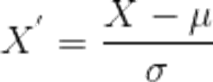

In [460]:
from sklearn.preprocessing import StandardScaler

In [461]:
scaled = StandardScaler()

In [462]:
scaled.fit(X_train)
scaled_X_train = scaled.transform(X_train)
scaled_X_test = scaled.transform(X_test)

<a id='ml'></a>
# Applying Machine Learning Algorithms

In [463]:
def get_score(model,X_train, X_test, y_train, y_test):
    model.fit(scaled_X_train,y_train)
    return model.score(scaled_X_test,y_test)

In [464]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve

## Logistic Regression Classification

In [465]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression()

In [466]:
get_score(Logistic,X_train, X_test, y_train, y_test)

0.7239248940036341

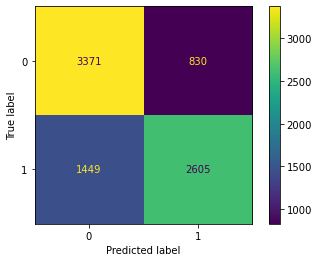

In [467]:
plot_confusion_matrix(Logistic,scaled_X_test,y_test)

In [468]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [469]:
Logistic_predicted = Logistic.predict(scaled_X_test)

In [470]:
m1 = accuracy_score(Logistic_predicted,y_test)
m1

0.7239248940036341

In [471]:
print(classification_report(y_test,Logistic_predicted))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      4201
           1       0.76      0.64      0.70      4054

    accuracy                           0.72      8255
   macro avg       0.73      0.72      0.72      8255
weighted avg       0.73      0.72      0.72      8255



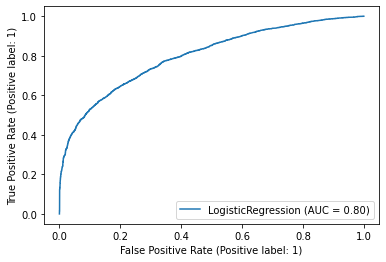

In [472]:
plot_roc_curve(Logistic,scaled_X_test,y_test)

## Decision Tree Classifier

In [473]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

In [474]:
get_score(tree_model,X_train, X_test, y_train, y_test)

0.82786190187765

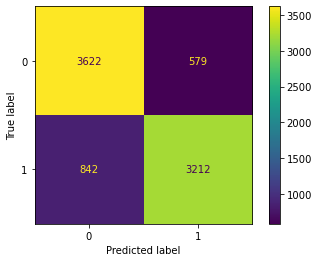

In [475]:
plot_confusion_matrix(tree_model,scaled_X_test,y_test)

In [476]:
Tree_predicted = tree_model.predict(scaled_X_test)

In [477]:
m2 = accuracy_score(Tree_predicted,y_test)
m2

0.82786190187765

In [478]:
print(classification_report(y_test,Tree_predicted))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      4201
           1       0.85      0.79      0.82      4054

    accuracy                           0.83      8255
   macro avg       0.83      0.83      0.83      8255
weighted avg       0.83      0.83      0.83      8255



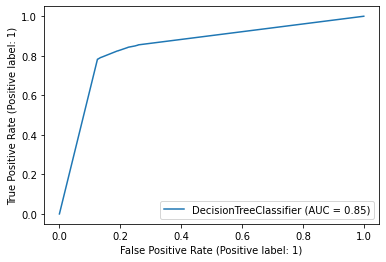

In [479]:
plot_roc_curve(tree_model,scaled_X_test,y_test)

## Random Forest Classifier

In [480]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=40,max_features='auto',random_state=101)

In [481]:
get_score(RFC,X_train, X_test, y_train, y_test)

0.7956390066626287

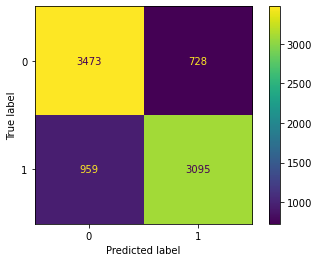

In [482]:
plot_confusion_matrix(RFC,scaled_X_test,y_test)

In [483]:
RFC_predicted = RFC.predict(scaled_X_test)

In [484]:
m3 = accuracy_score(RFC_predicted,y_test)
m3

0.7956390066626287

In [485]:
print(classification_report(y_test,RFC_predicted))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      4201
           1       0.81      0.76      0.79      4054

    accuracy                           0.80      8255
   macro avg       0.80      0.80      0.80      8255
weighted avg       0.80      0.80      0.80      8255



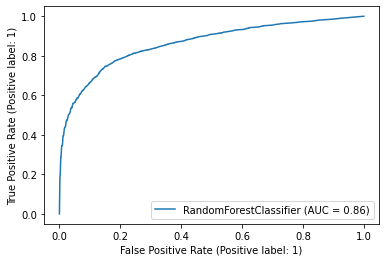

In [486]:
plot_roc_curve(RFC,scaled_X_test,y_test)

## Naive Bayes Classification

In [487]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [488]:
get_score(NB,X_train, X_test, y_train, y_test)

0.6712295578437311

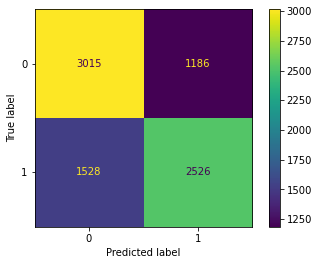

In [489]:
plot_confusion_matrix(NB,scaled_X_test,y_test)

In [490]:
NB_predicted = NB.predict(scaled_X_test)

In [491]:
m4 = accuracy_score(NB_predicted,y_test)
m4

0.6712295578437311

In [492]:
print(classification_report(y_test,NB_predicted))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      4201
           1       0.68      0.62      0.65      4054

    accuracy                           0.67      8255
   macro avg       0.67      0.67      0.67      8255
weighted avg       0.67      0.67      0.67      8255



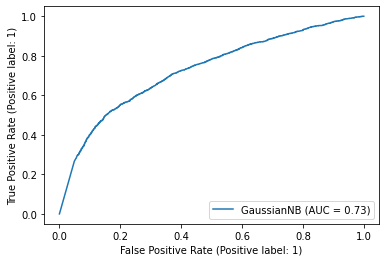

In [493]:
plot_roc_curve(NB,scaled_X_test,y_test)

## K Nearest Neighbors Classifier

In [494]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)

In [495]:
get_score(KNN,X_train, X_test, y_train, y_test)

0.6918231374924289

In [496]:
KNN_predicted = KNN.predict(scaled_X_test)

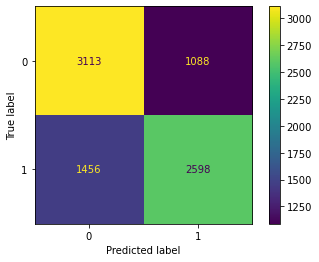

In [497]:
plot_confusion_matrix(KNN,scaled_X_test,y_test)

In [498]:
m5 = accuracy_score(KNN_predicted,y_test)
m5

0.6918231374924289

In [499]:
print(classification_report(y_test,KNN_predicted))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      4201
           1       0.70      0.64      0.67      4054

    accuracy                           0.69      8255
   macro avg       0.69      0.69      0.69      8255
weighted avg       0.69      0.69      0.69      8255



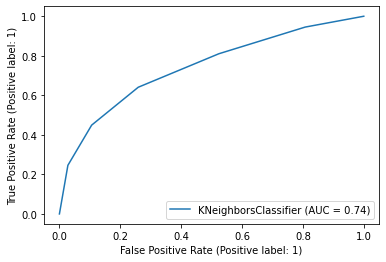

In [500]:
plot_roc_curve(KNN,scaled_X_test,y_test)

## Support Vector Machine

In [501]:
from sklearn.svm import SVC

In [502]:
svc = SVC()

In [503]:
get_score(svc,X_train, X_test, y_train, y_test)

0.7331314354936402

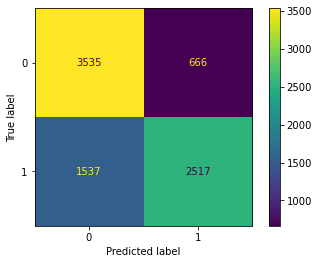

In [504]:
plot_confusion_matrix(svc,scaled_X_test,y_test)

In [505]:
svc_predicted = KNN.predict(scaled_X_test)

In [506]:
m6 = accuracy_score(svc_predicted,y_test)
m6

0.6918231374924289

In [507]:
print(classification_report(y_test,svc_predicted))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      4201
           1       0.70      0.64      0.67      4054

    accuracy                           0.69      8255
   macro avg       0.69      0.69      0.69      8255
weighted avg       0.69      0.69      0.69      8255



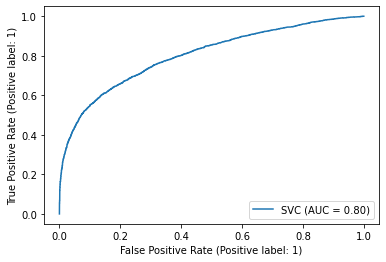

In [508]:
plot_roc_curve(svc,scaled_X_test,y_test)

## XG Boost Classifier

In [509]:
# pip install xgboost

In [510]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()

In [511]:
get_score(xgb_cl,X_train, X_test, y_train, y_test)

0.798182919442762

In [512]:
xgb_predicted = xgb_cl.predict(scaled_X_test)

In [513]:
m7 = accuracy_score(xgb_predicted,y_test)
m7

0.798182919442762

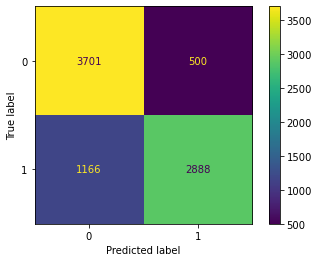

In [514]:
plot_confusion_matrix(xgb_cl,scaled_X_test,y_test)

In [515]:
print(classification_report(y_test,xgb_predicted))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      4201
           1       0.85      0.71      0.78      4054

    accuracy                           0.80      8255
   macro avg       0.81      0.80      0.80      8255
weighted avg       0.81      0.80      0.80      8255



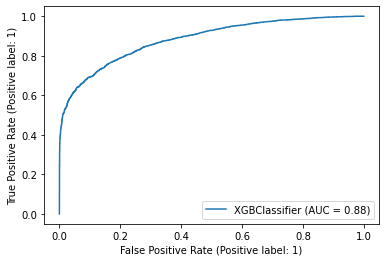

In [516]:
plot_roc_curve(xgb_cl,scaled_X_test,y_test)

## AdaBoost Classifier

In [517]:
from sklearn.ensemble import AdaBoostClassifier

In [518]:
ada = AdaBoostClassifier(base_estimator=tree_model,n_estimators=70,
                         learning_rate=1)
get_score(ada,X_train, X_test, y_train, y_test)

0.8298001211387038

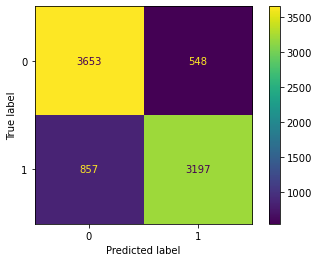

In [519]:
plot_confusion_matrix(ada,scaled_X_test,y_test)

In [520]:
ada_predicted = ada.predict(scaled_X_test)

In [521]:
print(classification_report(y_test,ada_predicted))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      4201
           1       0.85      0.79      0.82      4054

    accuracy                           0.83      8255
   macro avg       0.83      0.83      0.83      8255
weighted avg       0.83      0.83      0.83      8255



In [522]:
m8 = accuracy_score(ada_predicted,y_test)
m8

0.8298001211387038

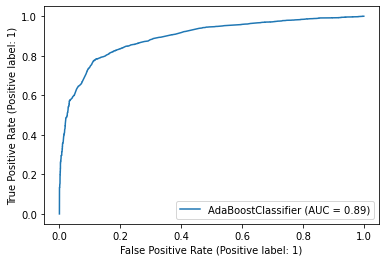

In [523]:
plot_roc_curve(ada,scaled_X_test,y_test)


<a id='algo'></a>

# Accuracy Check in Different Algorithms

In [524]:
sample = [['Logistic Regression Classification', np.round(m1*100)], ['Decision Tree Classifier', np.round(m2*100)], 
          ['Random Forest Classifier', np.round(m3*100)], ['Naive Bayes Classification', np.round(m4*100)]
         , ['K Nearest Neighbors Classifier', np.round(m5*100)], ['Support Vector Machine', np.round(m6*100)]
         , ['XG Boost Classifier', np.round(m7*100)], ['AdaBoost Classifier', np.round(m8*100)]]
 
accu = pd.DataFrame(sample, columns = ['ML Models', 'Accuracy in %'])
 
accu

,ML Models,Accuracy in %
0,Logistic Regression Classification,72.0
1,Decision Tree Classifier,83.0
2,Random Forest Classifier,80.0
3,Naive Bayes Classification,67.0
4,K Nearest Neighbors Classifier,69.0
5,Support Vector Machine,69.0
6,XG Boost Classifier,80.0
7,AdaBoost Classifier,83.0


<a id='nlp'></a>
# Sentiment Analysis Using NLP

<a id='wordcloud'></a>

## Analysing Customer Behaviour using WordCloud

In [238]:
from wordcloud import WordCloud, STOPWORDS

In [239]:
data = df[df['rest_type']=='Quick Bites']
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,Quick Bites + Casual Dining,1
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,Quick Bites + Casual Dining,1
36,https://www.zomato.com/bangalore/fast-and-fres...,"32, 7th Main Road, Dwaraka Nagar,Near PES Coll...",Fast And Fresh,Yes,No,2.8,91,+91 9742974232,Banashankari,Quick Bites,NaN,"North Indian, Chinese, Fast Food",400.0,"[('Rated 1.0', 'RATED\n Half baked rice in a ...",[],Delivery,Banashankari,Quick Bites + Casual Dining,1
39,https://www.zomato.com/bangalore/maruthi-davan...,"556/A, Water Tank Road, 3rd Stage, Banashankar...",Maruthi Davangere Benne Dosa,Yes,No,4.0,17,+91 9019563485,Banashankari,Quick Bites,NaN,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari,Quick Bites + Casual Dining,1


Checking for most dish_liked by customers

In [240]:
data['dish_liked']

3                                              Masala Dosa
31       Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34       Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
36                                                     NaN
39                                                     NaN
                               ...                        
51641                                                  NaN
51642                                                  NaN
51643                                                  NaN
51644                                                  NaN
51645                                              Burgers
Name: dish_liked, Length: 19132, dtype: object

In [241]:
data['dish_liked'].isnull().sum()

13843

We have 13843 null values in data['dish_liked'].
we'll remove that null values

In [242]:
stopwords=set(STOPWORDS)
dishes=''
for word in data['dish_liked'].dropna():
    words=word.split()
    # Converts each token into lowercase 
    for i in range(len(words)): 
        words[i] = words[i].lower() 
    dishes=dishes+ " ".join(words)+" "


In [243]:
dishes

'masala dosa burgers, lassi, chicken grill, naan, momos, chicken burger, biryani rolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrap dabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuri burgers, fries, hot chocolate pane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacos biryani paratha, pasta pasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghetti grape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rolls vegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryani rolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese roll benne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosa masala dosa panipuri, chaat, noodles, dahi bhalle rooftop ambience coffee, tea, kesari bath, open dosa, vada, idli, bread dosa masala dosa, tirupathi pongal, filter coffee, va

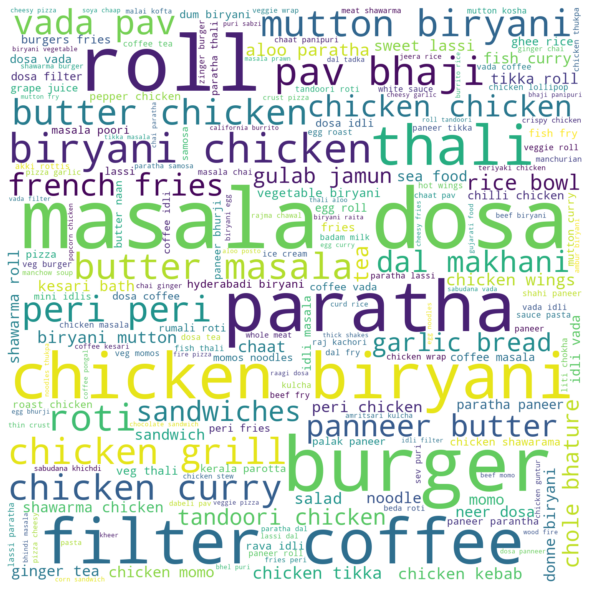

In [245]:
plt.figure(figsize = (8, 8), facecolor = None) 
wordcloud = WordCloud(background_color='white',stopwords = stopwords,width=1500, height=1500).generate(dishes)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show() 

## Analysing Reviews of Restaurant...

In [246]:
import pandas as pd

In [273]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Other,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1


In [274]:
df2 = pd.read_csv('zomato_NLP.csv')
df2.head()

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,...,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target,total_cuisines,multiple_types
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,...,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,3,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,...,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,3,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,...,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Other,1,1,3,2
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,...,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,0,2,1
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,...,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1,2,1


In [275]:
df3 = df2[['reviews_list','target']]
df3.head()

,reviews_list,target
0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",1
1,"[('Rated 4.0', 'RATED\n Had been here for din...",1
2,"[('Rated 3.0', ""RATED\n Ambience is not that ...",1
3,"[('Rated 4.0', ""RATED\n Great food and proper...",0
4,"[('Rated 4.0', 'RATED\n Very good restaurant ...",1


In [276]:
df3.rename(columns = {'target':'label'}, inplace = True)

In [277]:
df3.head()

,reviews_list,label
0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",1
1,"[('Rated 4.0', 'RATED\n Had been here for din...",1
2,"[('Rated 3.0', ""RATED\n Ambience is not that ...",1
3,"[('Rated 4.0', ""RATED\n Great food and proper...",0
4,"[('Rated 4.0', 'RATED\n Very good restaurant ...",1


In [278]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41665 entries, 0 to 41664
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviews_list  41665 non-null  object
 1   label         41665 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 651.1+ KB


In [279]:
df3['reviews_list'].dtype

dtype('O')

In [280]:
# Cleaning the texts

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words("english"))


<!-- . -->

<a id='lemi'></a>
## Lemmatization


* Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

In [281]:
lemmatizer = WordNetLemmatizer()

In [282]:

corpus4 = []
for i in range(0,len(df3)):
    review = re.sub('[^a-zA-Z]', ' ', str(df3['reviews_list'][i]))
    review = review.lower()
    review = re.sub('rated',' ',review)
    review = re.sub('x',' ',review)
    review = re.sub(' n',' ',review)
    review = re.sub(' +',' ',review)
    review = [word for word in review.split(' ') if word not in stop_words]
    review=" ".join(review)
    review = [lemmatizer.lemmatize(word) for word in review.split(' ')]
    review=" ".join(review)
    corpus4.append(review)


In [256]:
len(corpus4)

41665

In [257]:
corpus4[0]

' beautiful place dine interior take back mughal era lighting perfect went occasion christmas limited item available taste service ot compromised complaint bread could better would surely like come dinner family weekday restaurant completely empty ambience good good old hindi music seating arrangement good ordered masala papad panner baby corn starter lemon corrionder soup butter roti olive chilli paratha food fresh good service good good family hangout cheer restaurant ear banashankari bda along office friend visited buffet unfortunately provide veg buffet inquiring said place mostly visited vegetarian anyways ordered ala carte item took age come food ok ok definitely ot visiting anymore went weekend one u buffet two u took ala carte firstly ambience service place great buffet lot item good good pumpkin halwa intm dessert amazing must try kulchas great cheer best thing place ambiance second best thing yummy food try buffet buffet food ot disappointed u test quality service staff profe

<a id='tf'></a>

## TF-IDF (Term Frequency–Inverse Document Frequency)

* TfidfVectorizer and CountVectorizer both are methods for converting text data into vectors as model can process only numerical data.

* In CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.

* To overcome this , we use TfidfVectorizer .In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

In [309]:
corpus4[4]

' good restaurant eighbourhood buffet system properly arranged variety dish along garba dance puppet show good spread dessert live paratha kulcha making great service overwhelming e perience one kind e perience grand village offer desi food option jaljeera buttermilk chat papdi bhajiya dosa pav bhaji oodles many curry kulcha roti garama garam jalebies gulab jamuns beautiful ambience village people serving smile full heart go overall rating food ambience service pocket friendly '

In [283]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus4).toarray()

In [285]:
X.shape

(41665, 5000)

In [286]:
y=df3['label']
y

0        1
1        1
2        1
3        0
4        1
        ..
41660    0
41661    0
41662    0
41663    1
41664    0
Name: label, Length: 41665, dtype: int64

In [287]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

<a id='nb'></a>

## Naive Bayes Classification



#### The Naive Bayesian classifier consists of performing the below steps –

* Naive Bayes uses the Bayes’ Theorem and assumes that all predictors are independent. In other words, this classifier assumes that the presence of one particular feature in a class doesn’t affect the presence of another one. 



* Create a frequency table based on the words.Calculate the likelihood for each of the classes based on the frequency table.Calculate the posterior probability for each classThe highest posterior probability is the outcome of the prediction experiment. All these probabilities are calculated by using the Bayes Theorem. As the Naive Bayes algorithm has the assumption of the “Naive” features it performs much better than other algorithms like Logistic Regression, Tree based algorithms etc. The Naive Bayes classifier is much faster with its probability calculations. 


#####  Multinomial Naive Bayes
It is generally used where there are discrete features(for example – word counts in a text classification problem). It generally works with the integer counts which are generated as frequency for each word. All features follow multinomial distribution. In such cases TF-IDF(Term Frequency, Inverse Document Frequency) also works.



In [288]:
#  Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [289]:
y_pred=model.predict(X_test)

### Accuracy Check

In [290]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
accuracy_score(y_pred,y_test)

0.7526701068042722

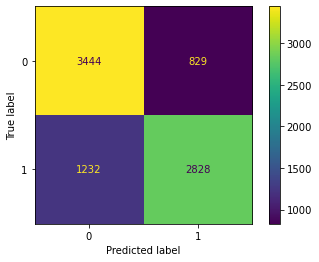

In [291]:
plot_confusion_matrix(model,X_test,y_test)

In [292]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      4273
           1       0.77      0.70      0.73      4060

    accuracy                           0.75      8333
   macro avg       0.75      0.75      0.75      8333
weighted avg       0.75      0.75      0.75      8333



## Logistic Regression Classification

In [293]:
from sklearn.linear_model import LogisticRegression

In [294]:
logi = LogisticRegression()

In [295]:
logi.fit(X_train,y_train)

LogisticRegression()

In [296]:
y_pred2 = logi.predict(X_test)

In [297]:
accuracy_score(y_pred2,y_test)

0.875315012600504

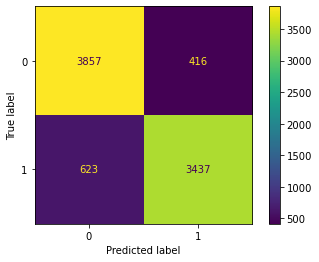

In [298]:
plot_confusion_matrix(logi,X_test,y_test)

In [299]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4273
           1       0.89      0.85      0.87      4060

    accuracy                           0.88      8333
   macro avg       0.88      0.87      0.87      8333
weighted avg       0.88      0.88      0.88      8333



----
-----

-------

<a id='con'></a>
# Conclusion

It is observed from the above graphs, charts, maps and wordcloud, a deep analysis is made on Zomato dataset 
which is used to get some idea about the restaurant at Bangalore and also answers the question that pop’s up in 
our mind based on restaurant. Some of the questions be like,

1. What are the foodie areas?
> Some of the Foodie areas are BTM, Koramangala 5th Block, HSR, Indiranagar, JP Nagar, Jayanagar, Whitefield.

2. Which restaurant get more ratings and voting’s from the customers?
>Highly rated restaurant is Asia Kitchen by Mainland China. 
>Highly voted restaurant is Byg Brewski Brewing company.

3. Which is the budget restaurant in Bangalore?
>Srinidhi Sagar where the approximate cost for two people is 40.

4. Which is the expensive restaurant in Bangalore?
>Le Cirque Signature - The Leela Palace where the approximate cost for two people is 6000.

5. Which restaurant accepts online order?
>64.4% of restaurants in Bangalore accepts online order.
>36.6% of restaurant in Bangalore do not accept online orders.

6. How many restaurants are in good ratings and budgeted too?
>There are more than 628 restaurants that are highly rated and budgeted too. There are many such questions 
comes to our mind, and answer also provided in the above analysis. This analysis helps to get some ideas, 
conclusions and figures of restaurants in Bangalore and also provided some of the valuable information about 
the restaurant, food cultures, No. of cuisines, No. of restaurants, Expensive restaurants, Cheapest restaurants, 
what people likes the most and also the locations of restaurants visualized through maps, feedback of 
restaurants provided by the customers etc. in Bangalore